[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alikn/intro_to_ai/blob/master/decision_trees.ipynb)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import graphviz

In [2]:
df = pd.read_csv('https://alik-courses.web.app/intro-to-ai/datasets/glass.csv')

### Split the data to train and validation sets

In [7]:
df_train_source, df_val_source = train_test_split(df, test_size=0.3, random_state=0)

In [8]:
df_train = df_train_source.copy()
df_val = df_val_source.copy()

In [9]:
df_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00,2
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00,1
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14,1
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09,7
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00,2
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.0,0.10,1


Data Dictionary

- Id: number: 1 to 214
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K : Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type : Type of glass: types 1, 2, and 3 are Window glass and types 5, 6, and 7 are household glass

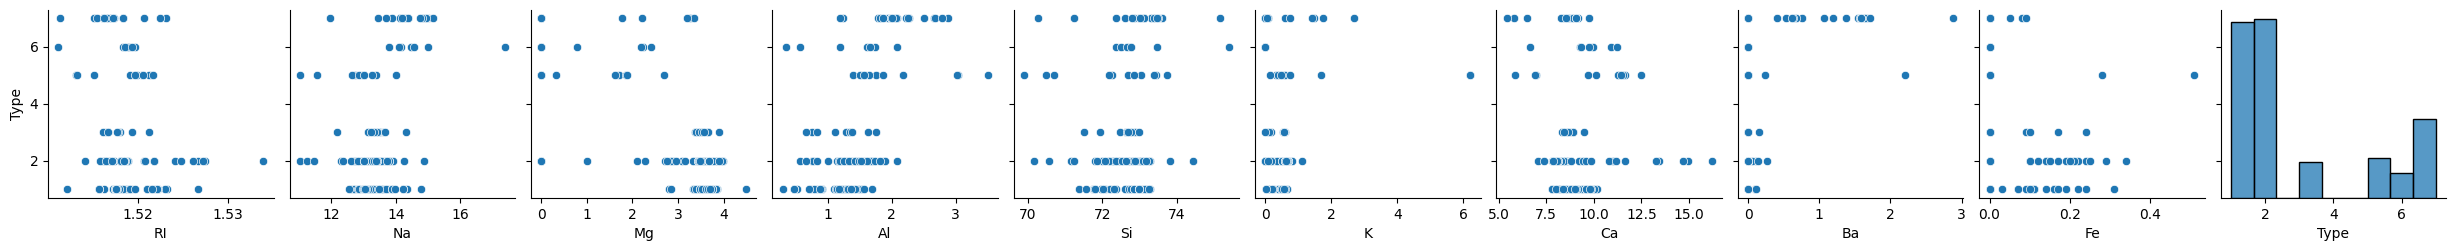

In [10]:
sns.pairplot(df_train, y_vars=['Type'])

To create a column which shows if a glass is of household type or window type, we map the "Type" column to a new column.
- Window glass: 0
- Household glass: 1

## Preprocessing

In [11]:
df_train['glass_category'] = df_train.Type.map({1: 0, 2: 0, 3: 0, 5: 1, 6: 1, 7: 1})

In [12]:
df_val['glass_category'] = df_val.Type.map({1: 0, 2: 0, 3: 0, 5: 1, 6: 1, 7: 1})

In [13]:
df_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,glass_category
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00,2,0
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3,0
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00,1,0
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14,1,0
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.0,0.00,1,0


## Decision tree for regression: predicting refractive index

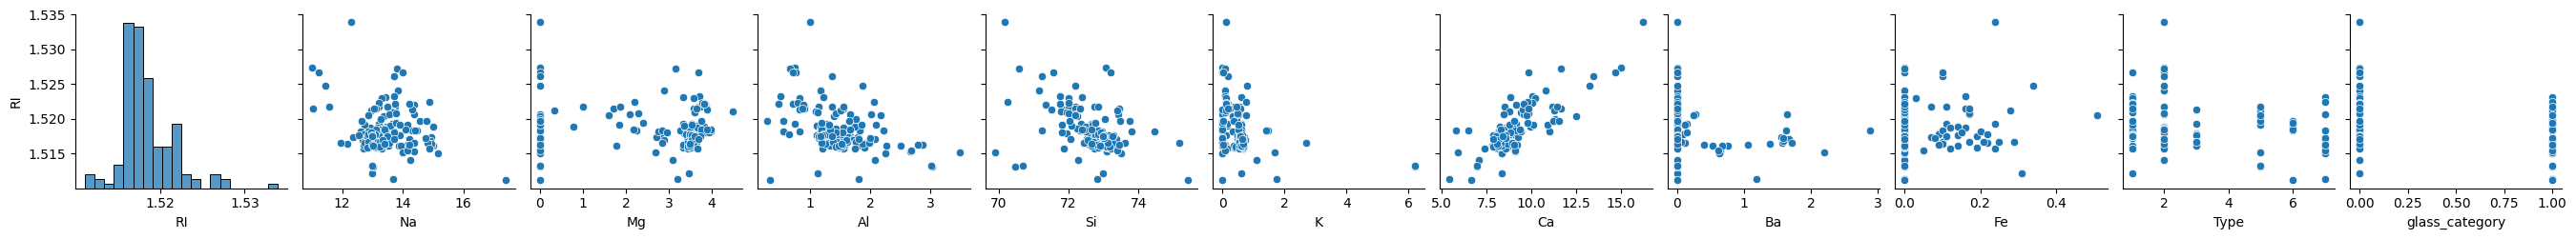

In [14]:
sns.pairplot(df_train, y_vars=['RI'])

In [15]:
df_train.corr()['RI']

RI                1.000000
Na               -0.229817
Mg               -0.066286
Al               -0.438911
Si               -0.443509
K                -0.317911
Ca                0.807006
Ba               -0.187448
Fe                0.132121
Type             -0.189612
glass_category   -0.153467
Name: RI, dtype: float64

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
dt_reg = DecisionTreeRegressor()
X_reg = df_train[['Ca']] 
y_reg = df_train['RI']
dt_reg.fit(X_reg, y_reg)

DecisionTreeRegressor()

In [21]:
dt_reg.predict([[13.5]])

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.52614])

In [22]:
dt_reg.predict([[14]])

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.52614])

### Creating a training function

In [23]:
def regressor(cols, **kwargs):
  # Instantiate
  reg = DecisionTreeRegressor(**kwargs)
  # Train on training set
  X_reg = df_train[cols] 
  y_reg = df_train['RI']
  reg.fit(X_reg, y_reg)
  # Evaluate on validation set
  y_reg_hat = reg.predict(df_val[cols])
  print(f"RMSE: {mean_squared_error(df_val['RI'], y_reg_hat, squared=False)}")
  return reg

In [24]:
reg_model = regressor(['Ca'])

RMSE: 0.002089101675832418


In [25]:
reg_model.get_depth()

15

In [26]:
reg_model = regressor(['Ca', 'Na', 'K'])

RMSE: 0.002556165698252588


In [27]:
reg_model.get_depth()

14

In [28]:
reg_model = regressor(['Ca'], max_depth=4)
reg_model.get_depth()

RMSE: 0.002068128407317199


4

## Classificaiton: predicting glass category

<AxesSubplot: >

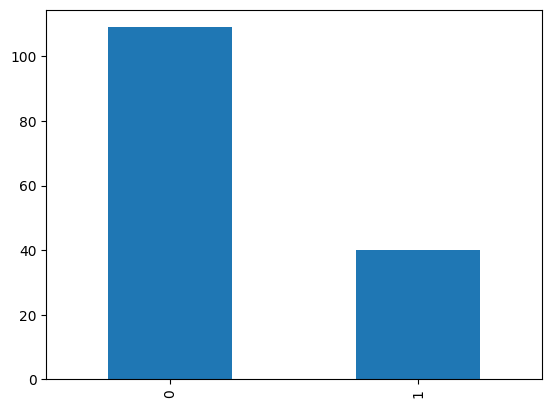

In [34]:
df_train['glass_category'].value_counts().plot(kind='bar')

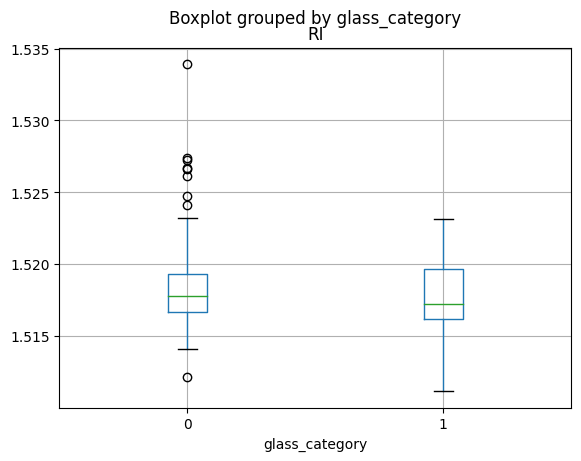

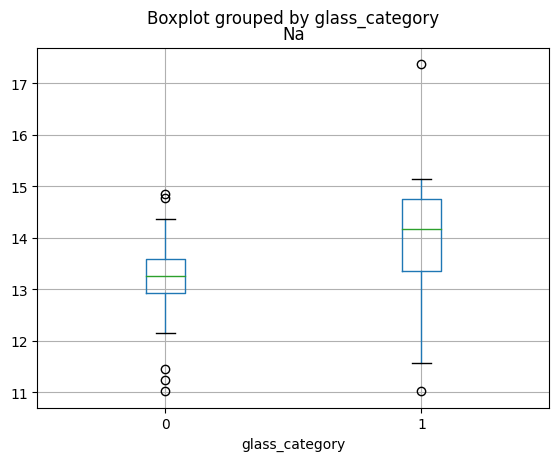

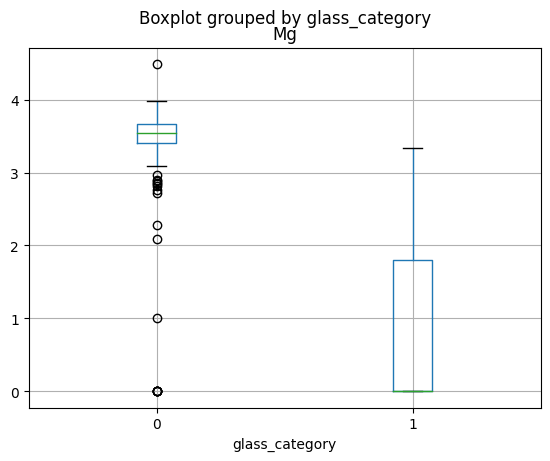

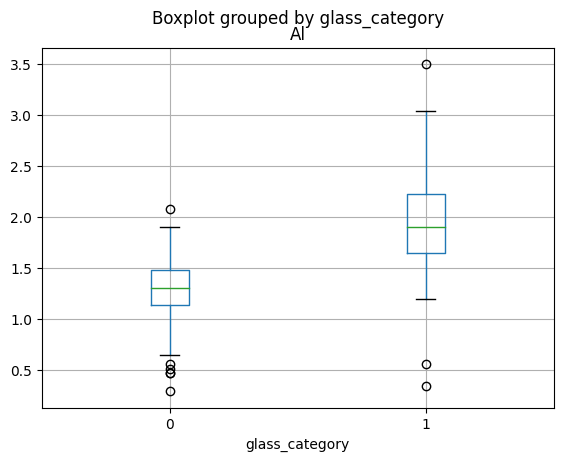

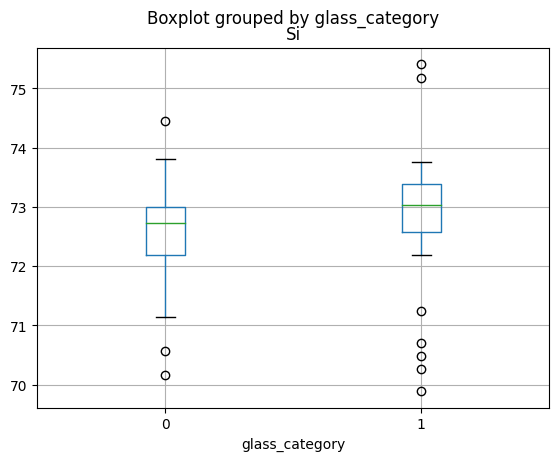

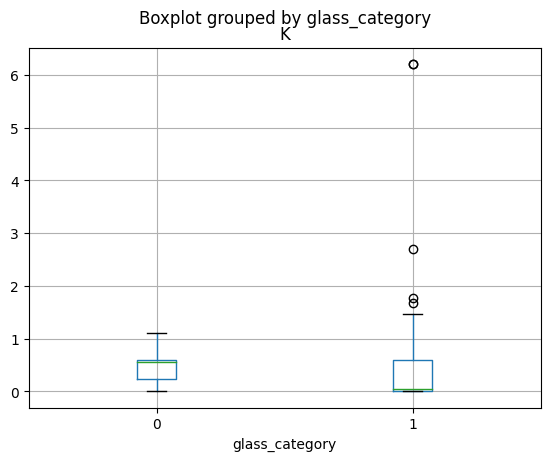

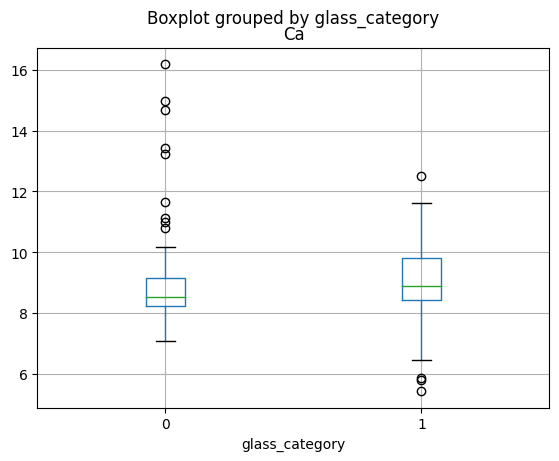

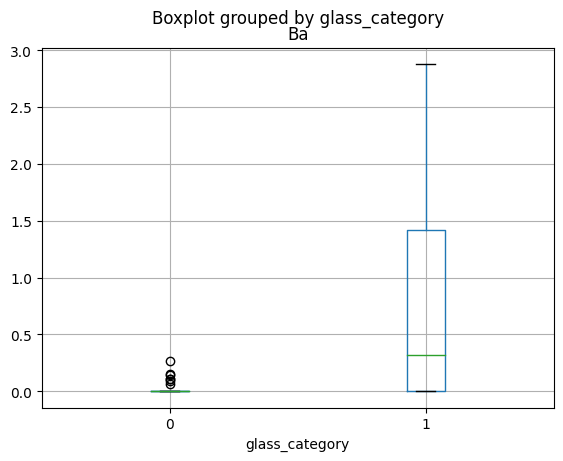

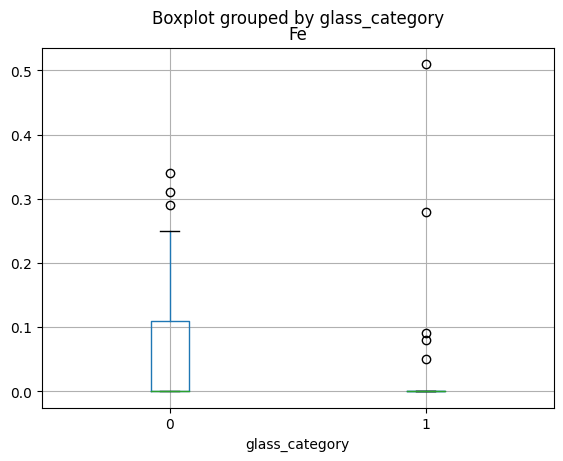

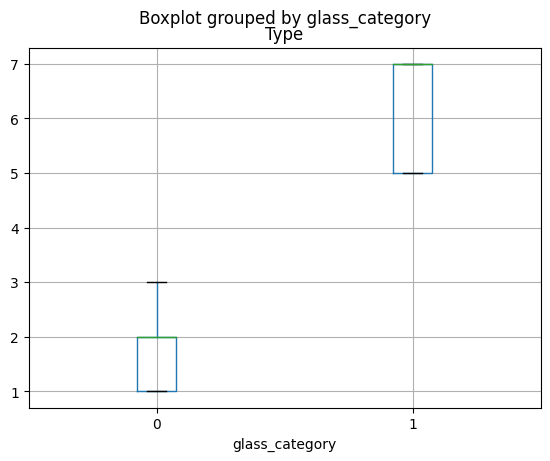

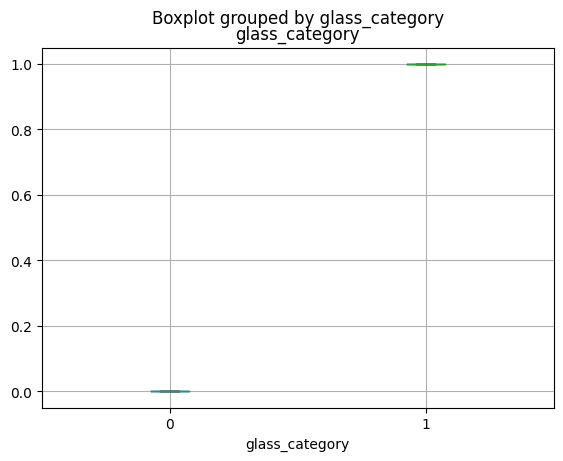

In [31]:
for col in df_train.columns:
    df_train.boxplot(column=col, by='glass_category')

### Training a logistic regression model

In [29]:
def train_log_reg(cols, C=1, max_iter=100, penalty='l2'):
  # Instantiate
  log_reg_model = LogisticRegression(C=C, max_iter=max_iter, penalty=penalty, solver='saga')
  # Trainin on training set
  log_reg_model.fit(df_train[cols], df_train['glass_category'])
  # Evaluate on validation set
  y_hat = log_reg_model.predict(df_val[cols])

  print(f"intercept: {log_reg_model.intercept_}")
  print(f"coefficients: {log_reg_model.coef_}")
  print(f"Accuracy score: {accuracy_score(df_val['glass_category'], y_hat)}")
  print(f"Precision score: {precision_score(df_val['glass_category'], y_hat)}")
  print(f"Recall score: {recall_score(df_val['glass_category'], y_hat)}")
  print(f"f1 score: {f1_score(df_val['glass_category'], y_hat)}")

In [35]:
train_log_reg(['Mg'])

intercept: [1.93178621]
coefficients: [[-1.31039592]]
Accuracy score: 0.8923076923076924
Precision score: 0.6666666666666666
Recall score: 0.7272727272727273
f1 score: 0.6956521739130435


In [36]:
train_log_reg(['Mg', 'Al'], max_iter=200)

intercept: [-1.33057693]
coefficients: [[-1.26448128  2.08285426]]
Accuracy score: 0.8923076923076924
Precision score: 0.6666666666666666
Recall score: 0.7272727272727273
f1 score: 0.6956521739130435


In [41]:
train_log_reg(['Na', 'Mg', 'Al', 'Si', 'Ca', 'Ba'])

intercept: [-0.00166309]
coefficients: [[ 0.29966982 -0.99140195  0.34802001 -0.02395547 -0.17477639  0.29445236]]
Accuracy score: 0.9538461538461539
Precision score: 0.8333333333333334
Recall score: 0.9090909090909091
f1 score: 0.8695652173913043


C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Training a decision tree classifier

In [43]:
def train_dt_classifier(cols, **kwargs):
  # Instantiate
  df_clf = DecisionTreeClassifier(**kwargs)
  # Train on training set
  df_clf.fit(df_train[cols], df_train['glass_category'])
  # Evaluate on validation set
  y_dt_hat = df_clf.predict(df_val[cols])

  print(f"Accuracy score: {accuracy_score(df_val['glass_category'], y_dt_hat)}")
  print(f"Precision score: {precision_score(df_val['glass_category'], y_dt_hat)}")
  print(f"Recall score: {recall_score(df_val['glass_category'], y_dt_hat)}")
  print(f"f1 score: {f1_score(df_val['glass_category'], y_dt_hat)}")
  return df_clf

In [44]:
dt_model = train_dt_classifier(['Mg', 'Al', 'Fe'])
dt_model.get_depth()

Accuracy score: 0.9692307692307692
Precision score: 0.8461538461538461
Recall score: 1.0
f1 score: 0.9166666666666666


6

In [46]:
dt_model.feature_importances_

array([0.71695154, 0.20504679, 0.07800167])

In [45]:
train_log_reg(['Mg', 'Al', 'Fe'], max_iter=200)

intercept: [-1.31045912]
coefficients: [[-1.2647051   2.09325053 -0.68612685]]
Accuracy score: 0.8923076923076924
Precision score: 0.6666666666666666
Recall score: 0.7272727272727273
f1 score: 0.6956521739130435


In [52]:
# Visualize a tree
# Create DOT data
# https://scikit-learn.org/stable/modules/tree.html
dot_data = export_graphviz(dt_model, out_file=None, 
                                feature_names=['Mg', 'Al', 'Fe'],  
                                class_names=['window', 'household'],
                                rounded=True,
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data) 
graph

In [55]:
dt_model = train_dt_classifier(['Mg', 'Al', 'Fe'], max_depth=2)

Accuracy score: 0.9538461538461539
Precision score: 0.8333333333333334
Recall score: 0.9090909090909091
f1 score: 0.8695652173913043


In [54]:
dot_data = export_graphviz(dt_model, out_file=None, 
                                feature_names=['Mg', 'Al', 'Fe'],  
                                class_names=['window', 'household'],
                                rounded=True,
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data) 
graph

In [56]:
dt_model = train_dt_classifier(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], max_depth=4)

Accuracy score: 0.9538461538461539
Precision score: 0.8333333333333334
Recall score: 0.9090909090909091
f1 score: 0.8695652173913043


In [57]:
dt_model.feature_importances_

array([0.        , 0.71895956, 0.02806347, 0.03820983, 0.07052088,
       0.13313067, 0.        , 0.01111559])

In [60]:
dt_model = train_dt_classifier(['Mg', 'Al', 'Si', 'K', 'Ca', 'Fe'], max_depth=6)

Accuracy score: 0.9538461538461539
Precision score: 0.9
Recall score: 0.8181818181818182
f1 score: 0.8571428571428572


The model with the best performance and lowest number of inputs:

In [61]:
dt_model = train_dt_classifier(['Mg', 'Al', 'Fe'])

Accuracy score: 0.9538461538461539
Precision score: 0.7857142857142857
Recall score: 1.0
f1 score: 0.88
